<a href="https://colab.research.google.com/github/anjaliharidevan-glitch/Internship/blob/main/brstcncr_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/breast_cancer_extracted/breast-cancer.data')

In [ ]:
df.head()

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [ ]:
df.dtypes

,0
no-recurrence-events,object
30-39,object
premeno,object
30-34,object
0-2,object
no,object
3,int64
left,object
left_low,object
no.1,object


In [ ]:
df.shape

(285, 10)

In [ ]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events
30-39,40-49,40-49,60-69,40-49,60-69,50-59,60-69,40-49,40-49,40-49
premeno,premeno,premeno,ge40,premeno,ge40,premeno,ge40,premeno,premeno,premeno
30-34,20-24,20-24,15-19,0-4,15-19,25-29,20-24,50-54,20-24,0-4
0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2
no,no,no,no,no,no,no,no,no,no,no
3,2,2,2,2,2,2,1,2,2,3
left,right,left,right,right,left,left,left,left,right,left
left_low,right_up,left_low,left_up,right_low,left_low,left_low,left_low,left_low,left_up,central
no.1,no,no,no,no,no,no,no,no,no,no


In [ ]:
df.columns = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

display(df.head())

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    unique_vals = df[col].dropna().unique()
    print(f"Column '{col}' ({len(unique_vals)} unique values):")
    print(unique_vals)
    print("-" * 50)

Column 'Class' (2 unique values):
['no-recurrence-events' 'recurrence-events']
--------------------------------------------------
Column 'age' (6 unique values):
['40-49' '60-69' '50-59' '30-39' '70-79' '20-29']
--------------------------------------------------
Column 'menopause' (3 unique values):
['premeno' 'ge40' 'lt40']
--------------------------------------------------
Column 'tumor-size' (11 unique values):
['20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '30-34' '40-44' '35-39'
 '5-9' '45-49']
--------------------------------------------------
Column 'inv-nodes' (7 unique values):
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
--------------------------------------------------
Column 'node-caps' (3 unique values):
['no' 'yes' '?']
--------------------------------------------------
Column 'breast' (2 unique values):
['right' 'left']
--------------------------------------------------
Column 'breast-quad' (6 unique values):
['right_up' 'left_low' 'left_up' 'right_low' 'central' 

In [ ]:
for col in df.columns:
    q_count = df[col][df[col] == '?'].count()
    nan_count = df[col].isna().sum()
    total_missing = q_count + nan_count
    if total_missing > 0:
        print(f"column '{col}': '?' = {q_count}, NaN = {nan_count}, Total missing = {total_missing}")

column 'node-caps': '?' = 8, NaN = 0, Total missing = 8
column 'breast-quad': '?' = 1, NaN = 0, Total missing = 1


In [ ]:
import numpy as np

df_missing = df.replace("?", np.nan)

missing_proportions = df_missing.isna().mean()

for col, prop in missing_proportions.items():
    if prop:
        print(f"Column '{col}': {prop:.2%} missing (including '?')")

Column 'node-caps': 2.81% missing (including '?')
Column 'breast-quad': 0.35% missing (including '?')


In [ ]:
df.replace('?', np.nan, inplace=True)

cols_with_missing = ['node-caps', 'breast-quad']

df_cleaned = df.dropna(subset=cols_with_missing).reset_index(drop=True)

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after dropping rows with missing values: {df_cleaned.shape}")

print("\nMissing values in cleaned DataFrame:")
print(df_cleaned.isnull().sum())

Original DataFrame shape: (285, 10)
DataFrame shape after dropping rows with missing values: (276, 10)

Missing values in cleaned DataFrame:
Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


In [ ]:
df.shape

(285, 10)

In [ ]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

age 0
menopause 0
tumor-size 0
inv-nodes 0
node-caps 0
breast 0
breast-quad 0
irradiat 0


In [ ]:
df['Class'].value_counts()

,count
Class,
0,200
1,85


In [ ]:
df['Class'] = df['Class'].replace('no-recurrence-events', 0)
df['Class'] = df['Class'].replace('recurrence-events', 1)
df['Class'].value_counts()

,count
Class,
0,200
1,85


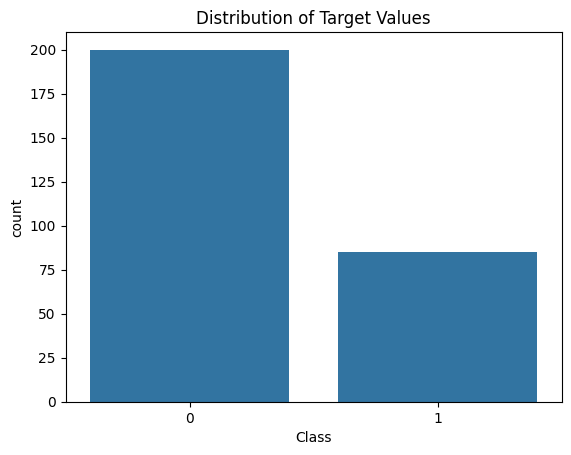

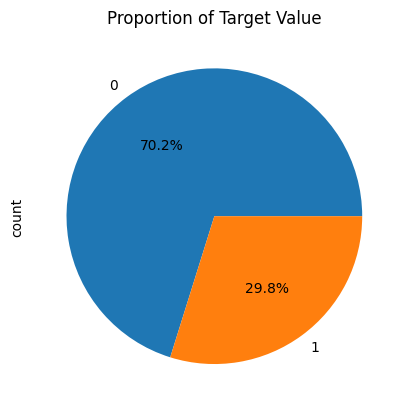

In [ ]:
sns.countplot(x = "Class", data = df)
plt.title("Distribution of Target Values")
plt.show()

# Pie chart
df.Class.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

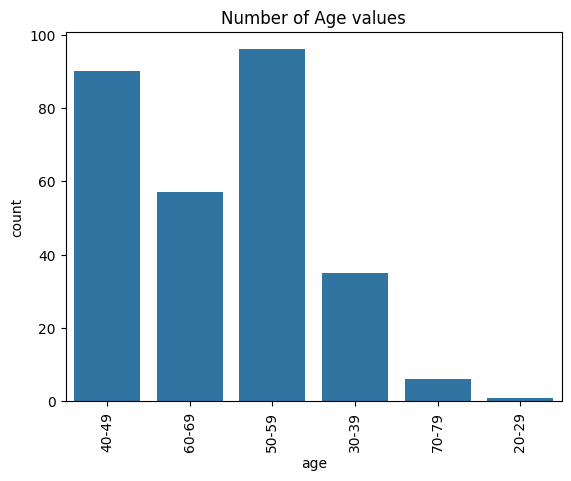

Proportion of Age
age
50-59    33.684211
40-49    31.578947
60-69    20.000000
30-39    12.280702
70-79     2.105263
20-29     0.350877
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x="age", data = df)
plt.xticks(rotation=90)
plt.title("Number of Age values")
plt.show()

print("Proportion of Age")
print(df.age.value_counts(normalize = True)*100)

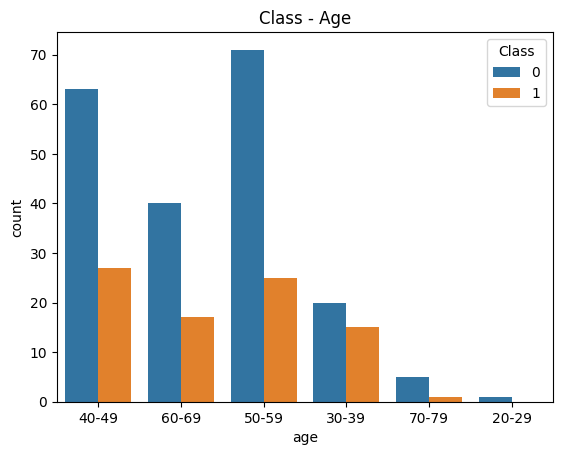

In [ ]:
sns.countplot(x="age", hue= "Class", data = df)
plt.title("Class - Age")
plt.show()

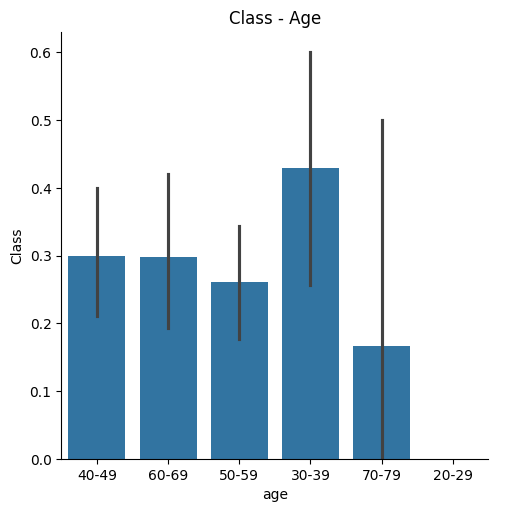

In [ ]:
sns.catplot(x = "age", y = "Class", data = df, kind = "bar", height= 5)
plt.title("Class - Age")
plt.show()

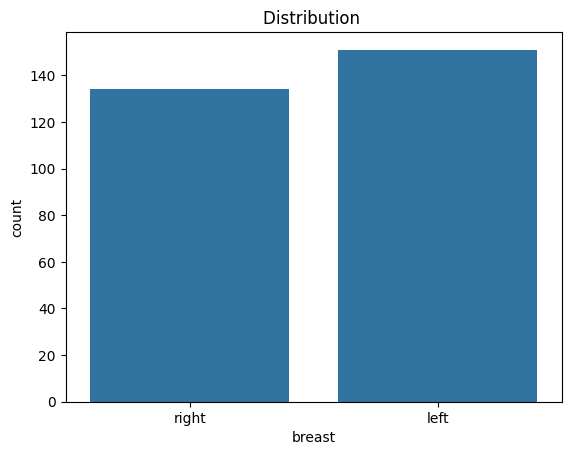

Proportions of Breast 
breast
left     52.982456
right    47.017544
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x = "breast", data = df)
plt.title("Distribution ")
plt.show()

print("Proportions of Breast ")
print(df.breast.value_counts(normalize = True)*100)

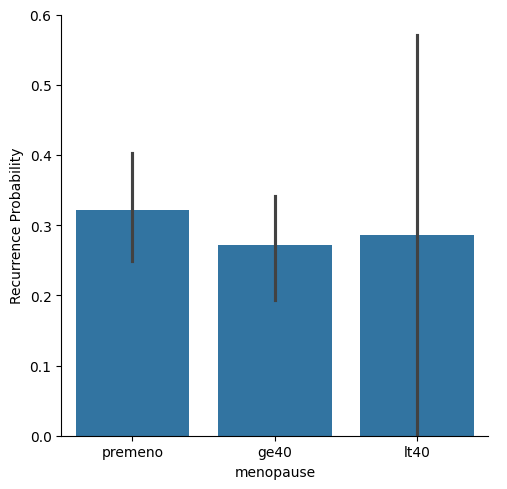

In [ ]:
g = sns.catplot(x = "menopause",y = "Class",
                data = df, kind = "bar", height= 5)
g.set_axis_labels(y_var="Recurrence Probability")
plt.show()

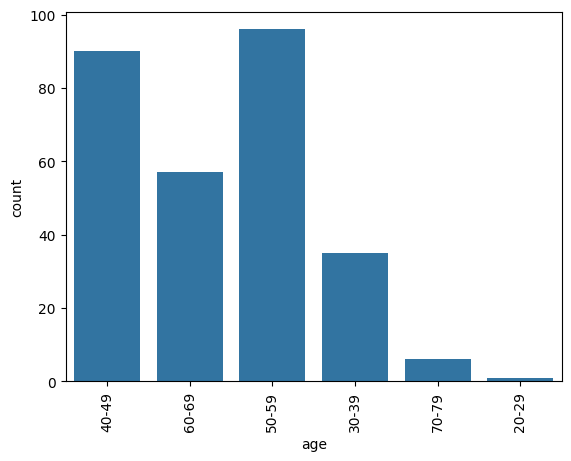

In [ ]:
sns.countplot(x="age", data = df)
plt.xticks(rotation = 90)
plt.show()

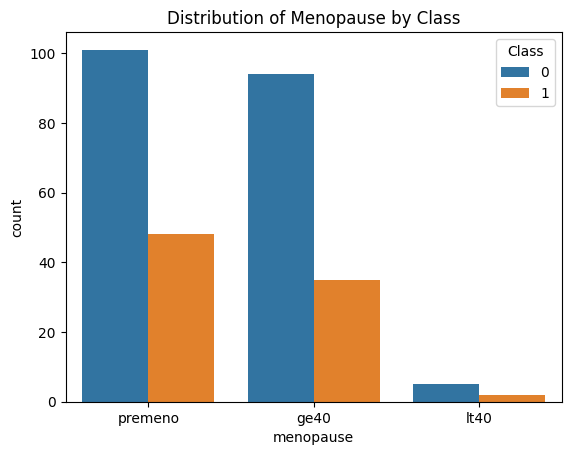

Distribution of Menopause values by Class:
menopause  Class
ge40       0         94
           1         35
lt40       0          5
           1          2
premeno    0        101
           1         48
Name: count, dtype: int64


In [ ]:

sns.countplot(x = "menopause",  hue = "Class", data = df)
plt.title("Distribution of Menopause by Class")
plt.show()

print("Distribution of Menopause values by Class:")
print(df.groupby('menopause')['Class'].value_counts())

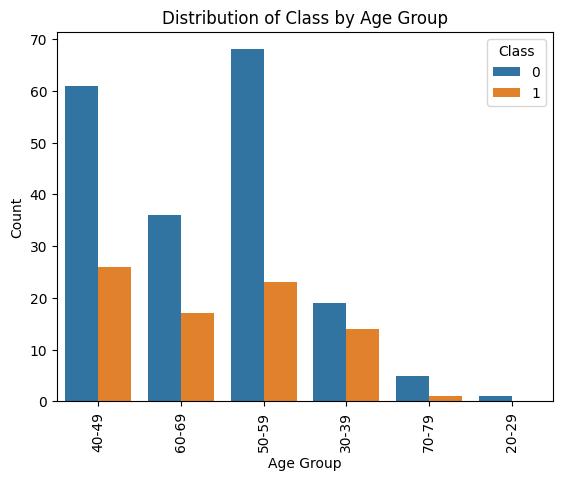

In [ ]:
sns.countplot(x = "age", hue = "Class", data = df)
plt.xticks(rotation=90)
plt.title("Distribution of Class by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

In [ ]:
original_shape = df.shape
df = df.drop_duplicates(keep='first')
new_shape = df.shape

print(f"Original DataFrame shape: {original_shape}")
print(f"DataFrame shape after dropping exact duplicates: {new_shape}")

Original DataFrame shape: (271, 10)
DataFrame shape after dropping exact duplicates: (271, 10)


In [ ]:
df['Class_encoded'] = df['Class'].replace({'no-recurrence-events': 0, 'recurrence-events': 1})
print(df['Class_encoded'].value_counts())

Class_encoded
0    190
1     81
Name: count, dtype: int64


/tmp/ipython-input-2348431107.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Class_encoded'] == 0),'deg-malig'] , color='b',shade=True,label='no-recurrence-events')
/tmp/ipython-input-2348431107.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Class_encoded'] == 1),'deg-malig'] , color='r',shade=True, label='recurrence-events')


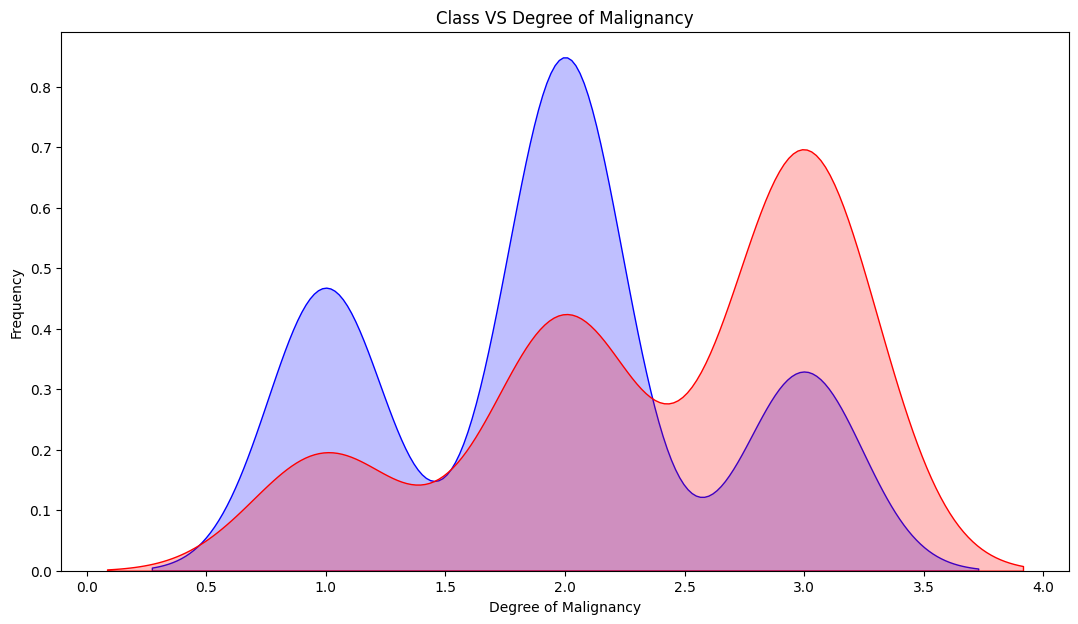

In [ ]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['Class_encoded'] == 0),'deg-malig'] , color='b',shade=True,label='no-recurrence-events')
ax=sns.kdeplot(df.loc[(df['Class_encoded'] == 1),'deg-malig'] , color='r',shade=True, label='recurrence-events')
ax.set(xlabel='Degree of Malignancy', ylabel='Frequency')
plt.title('Class VS Degree of Malignancy')
plt.show()

In [ ]:

skewness_deg_malig = df['deg-malig'].skew()
kurtosis_deg_malig = df['deg-malig'].kurtosis()

print(f"Skewness of 'deg-malig': {skewness_deg_malig:.4f}")
print(f"Kurtosis of 'deg-malig': {kurtosis_deg_malig:.4f}")

Skewness of 'deg-malig': -0.0873
Kurtosis of 'deg-malig': -1.1423


In [ ]:
df.to_pickle("breast_cancer_data.pkl")
print("DataFrame saved as breast_cancer_data.pkl")

DataFrame saved as breast_cancer_data.pkl


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

,Class,deg-malig,Class_encoded,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,...,inv-nodes_3-5,inv-nodes_6-8,inv-nodes_9-11,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,0,2,0,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
1,0,2,0,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,0,2,0,False,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
3,0,2,0,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False
4,0,2,0,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
correlation_matrix = df_encoded.corr()

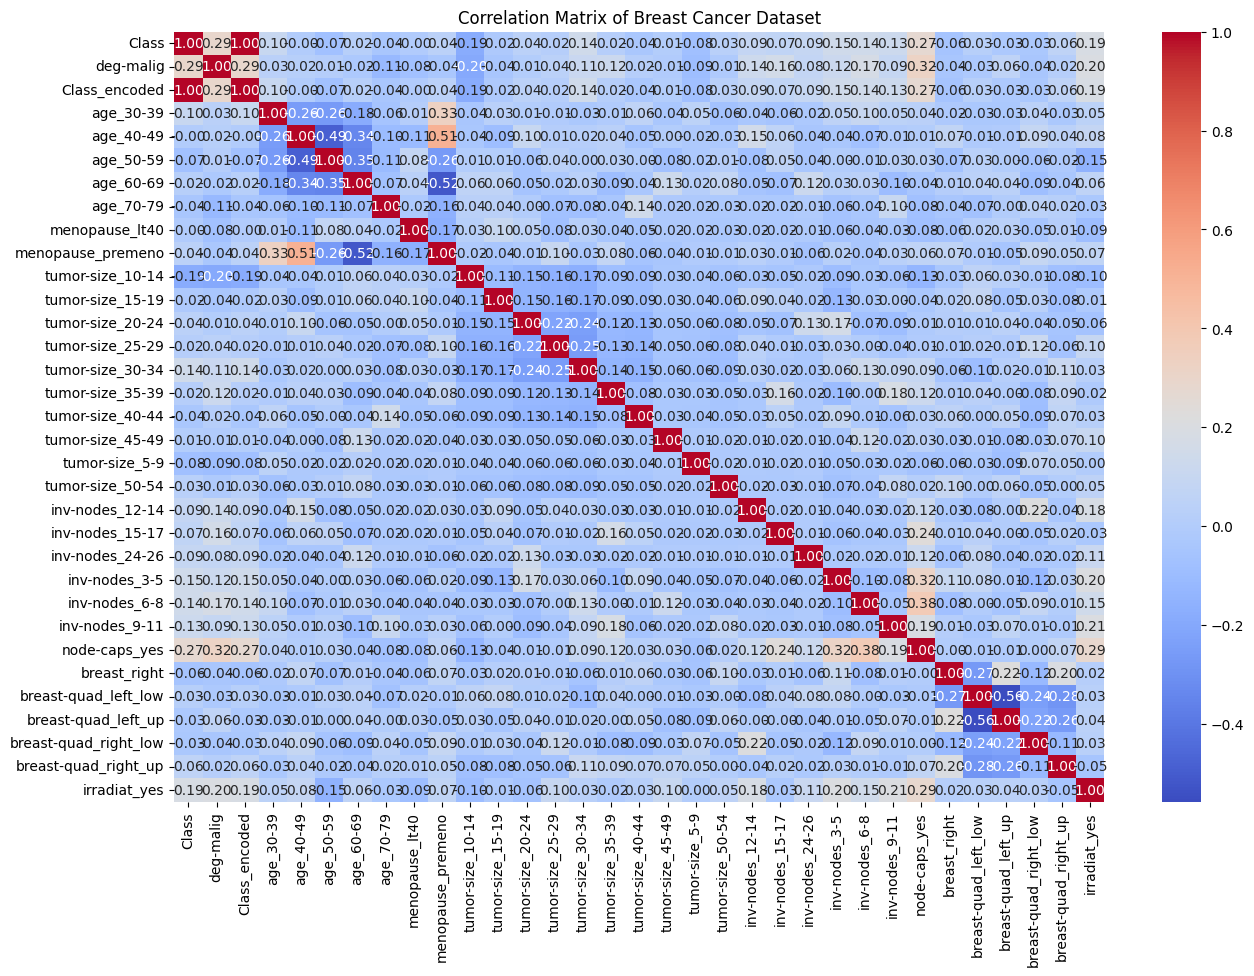

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Breast Cancer Dataset")
plt.show()